### To predict whether a employee will churn or not based on various criterions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
###create DataFrmae to read dataset
df = pd.read_csv('HR_Dataset.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
0,0.38,0.53,2,157,3,0,1,0,low
1,0.80,0.86,5,262,6,0,1,0,medium
2,0.11,0.88,7,272,4,0,1,0,medium
3,0.72,0.87,5,223,5,0,1,0,low
4,0.37,0.52,2,159,3,0,1,0,low


In [3]:
##Gives rows and columns in datafrmae
df.shape

(14999, 9)

In [4]:
### Gives information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(1)
memory usage: 1.0+ MB


**Features Description**

**Satisfaction_level:** It is employee satisfaction point, which ranges from 0-1.

**last_evaluation:** It is evaluated performance by the employer, which also ranges from 0-1.

**number_projects:** How many of projects assigned to an employee?

**average_monthly_hours:** How many hours in averega an employee worked in a month?

**time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.

**work_accident:**  Whether an employee has had a work accident or not.

**promotion_last_5years:** Whether an employee has had a promotion in the last 5 years or not.

**Departments:** Employee's working department/division.

**Salary:** Salary level of the employee such as low, medium and high.

**left:** Whether the employee has left the company or not.

In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
df.describe(include='object')

,salary
count,14999
unique,3
top,low
freq,7316


In [7]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
salary                   0
dtype: int64

- There is no null value in this dataset

In [8]:
df['Work_accident'].unique()

array([0, 1], dtype=int64)

In [9]:
df['promotion_last_5years'].unique()

array([0, 1], dtype=int64)

In [10]:
df['left'].unique()

array([1, 0], dtype=int64)

In [11]:
df['left'].value_counts(normalize=True)

0    0.761917
1    0.238083
Name: left, dtype: float64

### Data Visualization(EDA)

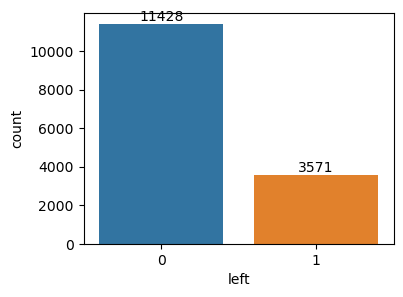

In [12]:
plt.figure(figsize=(4,3))
ax = sns.countplot(df['left'])
for label in ax.containers:
    ax.bar_label(label)
plt.show()

**Observation:** We can see that only about 23% people left, and its shows the data imbalnace

In [13]:
df['salary'].value_counts(normalize=True)

low       0.487766
medium    0.429762
high      0.082472
Name: salary, dtype: float64

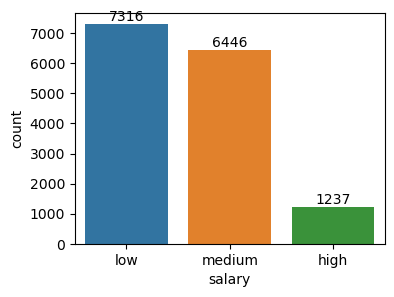

In [14]:
plt.figure(figsize=(4,3))
ax = sns.countplot(df['salary'])
for label in ax.containers:
    ax.bar_label(label)
plt.show()

**Observations:** Only about 8% Employees salary are high and most of the peoples salary are low and medium.

In [15]:
df['Work_accident'].value_counts(normalize=True)

0    0.85539
1    0.14461
Name: Work_accident, dtype: float64

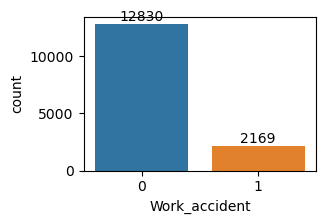

In [16]:
plt.figure(figsize=(3,2))
ax = sns.countplot(df['Work_accident'])
for label in ax.containers:
    ax.bar_label(label)
plt.show()

**Observation:** About 14% People had the work accidents.

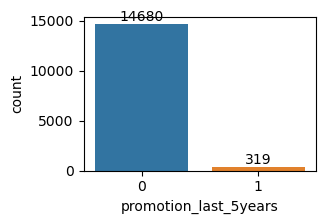

In [17]:
plt.figure(figsize=(3,2))
ax = sns.countplot(df['promotion_last_5years'])
for label in ax.containers:
    ax.bar_label(label)
plt.show()


**Observation:** Very few people gets promoted in last 5 yrs

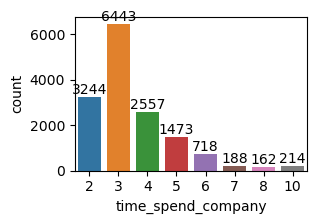

In [18]:
plt.figure(figsize=(3,2))
ax = sns.countplot(df['time_spend_company'])
for label in ax.containers:
    ax.bar_label(label)
plt.show()

**Observations:** Most of the employee in the company are since 3 yrs followed by 2yrs and 4 yrs

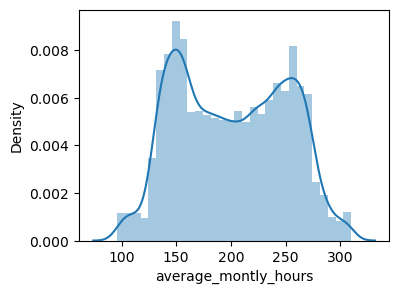

In [19]:
plt.figure(figsize=(4,3))
sns.distplot(df['average_montly_hours'], kde=True)
plt.show()


**Obervations:** Working hours for employee in a month is b/w 150 hrs to 300 hrs and has high counts at 150 and 250.

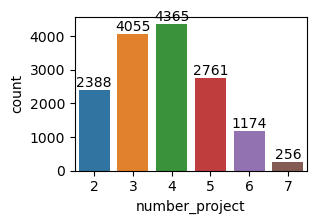

In [20]:
plt.figure(figsize=(3,2))
ax = sns.countplot(df['number_project'])
for label in ax.containers:
    ax.bar_label(label)
plt.show()

**Observation:** Most of the employees are assigned 4 projects followed by 3 and 5 projects

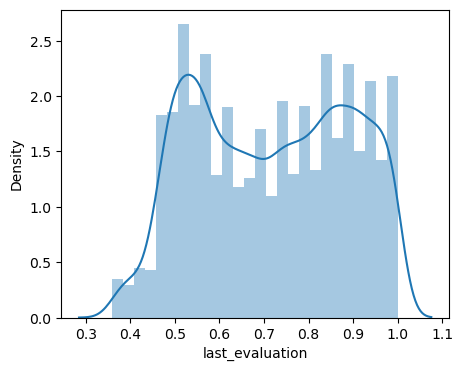

In [21]:
plt.figure(figsize=(5,4))
sns.distplot(df['last_evaluation'], kde=True)
plt.show()

**Observation:** Employees performence is evaluated b/w 0.5 to 1 b employer.

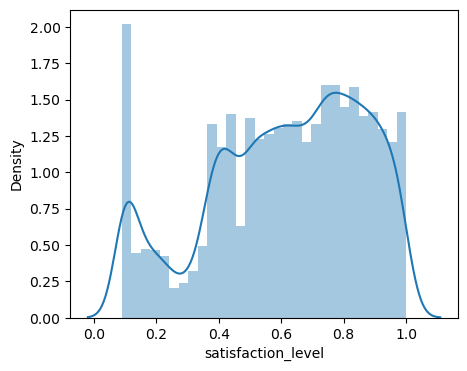

In [22]:
plt.figure(figsize=(5,4))
sns.distplot(df['satisfaction_level'], kde=True)
plt.show()

**Observation:** it is ditributed from 0.1 to 1 where it has high count at 0.1.

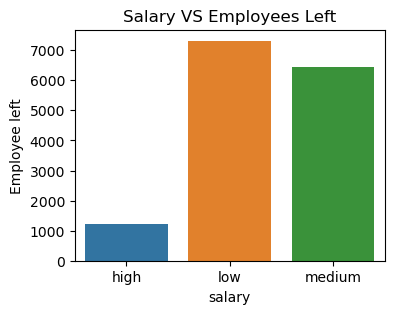

In [23]:
salary_left  = df.groupby(['salary']).count()['left']
plt.figure(figsize=(4,3))
sns.barplot(x=salary_left.index, y=salary_left.values)
plt.title('Salary VS Employees Left')
plt.ylabel('Employee left')
plt.show()

In [24]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
salary                    object
dtype: object

**Observation:** We can see that the employee getting low salary are more tends to leave the company followed by employee with medium salary.

<Figure size 300x200 with 0 Axes>

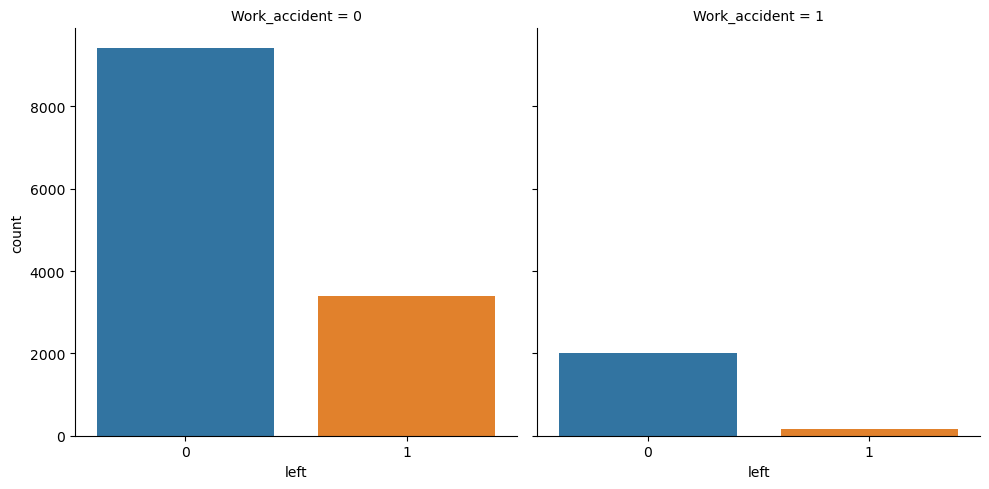

In [25]:
plt.figure(figsize=(3,2))
sns.catplot(x='left', col='Work_accident', kind='count', data=df);

**Obervation:** We can see that  employee who didn,t have work accident tends to leave the company so we can say that this features is less importance.

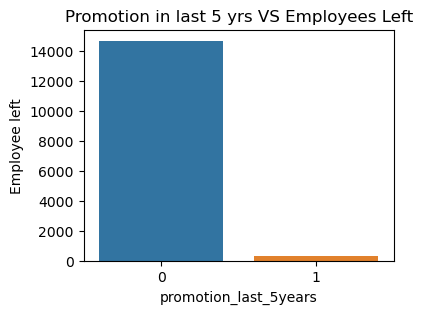

In [26]:
promotion_left  = df.groupby(['promotion_last_5years']).count()['left']
plt.figure(figsize=(4,3))
sns.barplot(x=promotion_left.index, y=promotion_left.values)
plt.title('Promotion in last 5 yrs VS Employees Left')
plt.ylabel('Employee left')
plt.show()

**Observation:** we can see that most of the employees left the company who didn,t got the promotion in last 5 yrs.

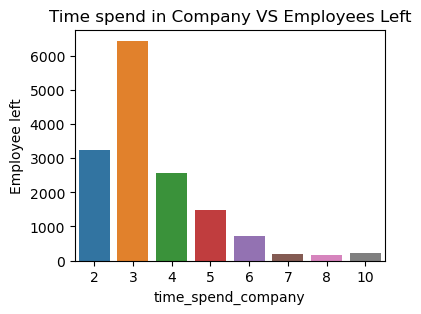

In [27]:
time_spend_left  = df.groupby(['time_spend_company']).count()['left']
plt.figure(figsize=(4,3))
sns.barplot(x= time_spend_left.index, y= time_spend_left.values)
plt.title('Time spend in Company VS Employees Left')
plt.ylabel('Employee left')
plt.show()

**Observation:** We can see that, employees who are in comapany from  last 3yrs are more tend to leave the comapny follwed by 2 yrs.

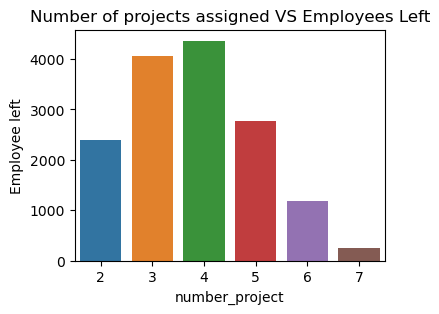

In [28]:
number_project_left  = df.groupby(['number_project']).count()['left']
plt.figure(figsize=(4,3))
sns.barplot(x= number_project_left.index, y= number_project_left.values)
plt.title('Number of projects assigned VS Employees Left')
plt.ylabel('Employee left')
plt.show()

**Obervations:** Employees whosw assigned no of 4 projects are more tends to leave the company follwed by 3 projects.

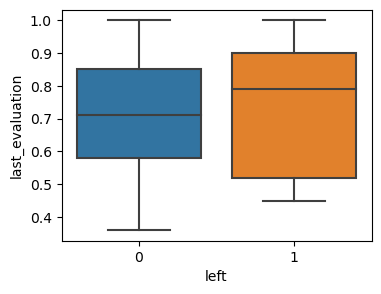

In [29]:
plt.figure(figsize=(4,3))
sns.boxplot(x='left', y='last_evaluation', data=df)
plt.show()

**Observation:** We can see that, the employee having good evaluation are more tend to leave the company.

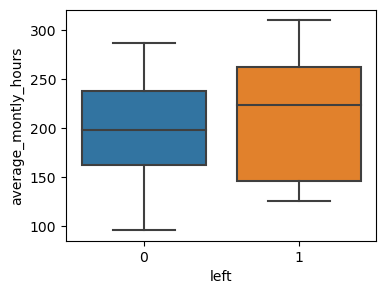

In [30]:
plt.figure(figsize=(4,3))
sns.boxplot(x='left', y='average_montly_hours', data=df)
plt.show()

**Observation:** we can see that employee having more avg_working_hours are more tends to leave the company.

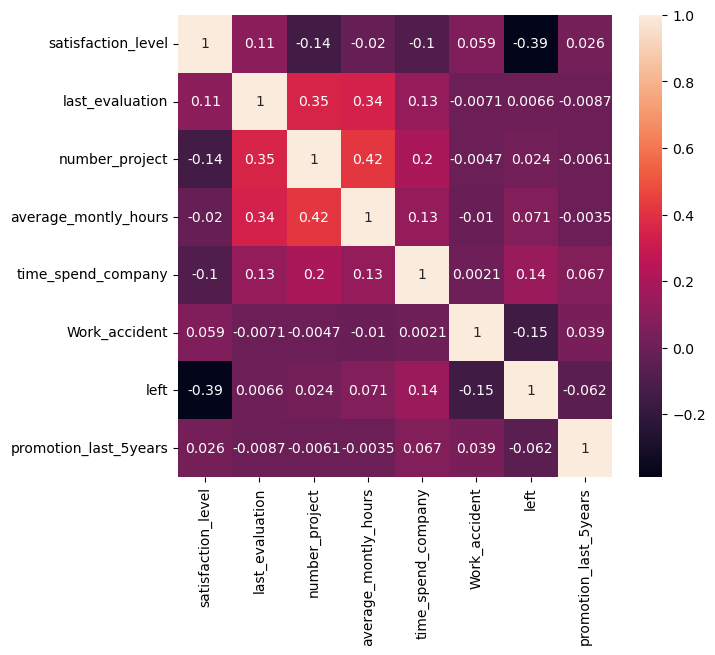

In [31]:
plt.figure(figsize=(7,6))
sns.heatmap(df.corr(), annot=True)
plt.show()

### Feature Engineering

In [32]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [33]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df['salary'] = oe.fit_transform(df[['salary']])

In [34]:
df['salary'] = df['salary'].astype('int')

In [35]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

- We can see that, the dataset is imbalenced, so will do **oversampling of minority class by SMOTE.**

In [36]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
0,0.38,0.53,2,157,3,0,1,0,1
1,0.80,0.86,5,262,6,0,1,0,2
2,0.11,0.88,7,272,4,0,1,0,2
3,0.72,0.87,5,223,5,0,1,0,1
4,0.37,0.52,2,159,3,0,1,0,1


In [37]:
X = df.drop(columns='left')
y = df['left']

In [38]:
print(X.shape, y.shape)

(14999, 8) (14999,)


In [39]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_new, y_new = smote.fit_resample(X,y)

print('-------------------------------------')
print('dataset shape after smote:',y_new.value_counts())

-------------------------------------
dataset shape after smote: 1    11428
0    11428
Name: left, dtype: int64


**Train-Test Split**

In [40]:
#Splitting the dataset into train and test samples.
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X_new, y_new, test_size=0.2,random_state=0)
print(X_train.shape, X_test.shape)

(18284, 8) (4572, 8)


**Model Selection**

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve

In [42]:
##Creating a function to calculate best model for this problem
models = {'random_forest':{'model':RandomForestClassifier(random_state=0), 'parameters':{'n_estimators':[5,10,15,20,30,50],
                                   'criterion':['gini','entropy'], 'max_depth':range(2,4,1), 'max_features':['auto','log2']}},
              
              'xg_boost':{'model':XGBClassifier(objective='binary:logistic'), 'parameters':{'n_estimators':[10,50,100,200],
                            'max_depth':[3,5,10,20], 'gamma':[0,0.3,0.5,1]}}}
    

scores = []
for model_name, model_params in models.items():
    gs = GridSearchCV(model_params['model'], model_params['parameters'], cv=5, return_train_score=False)
    gs.fit(X,y)
    scores.append({'model': model_name,'best_parameters':gs.best_params_, 'score':gs.best_score_})

In [43]:
scores

[{'model': 'random_forest',
  'best_parameters': {'criterion': 'gini',
   'max_depth': 3,
   'max_features': 'log2',
   'n_estimators': 5},
  'score': 0.9393299544292543},
 {'model': 'xg_boost',
  'best_parameters': {'gamma': 0.3, 'max_depth': 20, 'n_estimators': 100},
  'score': 0.9907327553628988}]

In [44]:
# Using cross_val_score for getting highest accuracy
from sklearn.model_selection import cross_val_score
scores = cross_val_score(XGBClassifier(gamma=0.3, max_depth=20, n_estimators=100), X,y, cv=5)
print('Cross validation Score:{}%'.format(round(sum(scores)*100/len(scores)),3))

Cross validation Score:99%


In [45]:
#Creatin XGBClassifier model
model = XGBClassifier(gamma=0.3, max_depth=20, n_estimators=100)
model.fit(X_train,y_train)
model.score(X_test, y_test)

0.9822834645669292

In [46]:
ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, ypred_train))
print("Test Accuracy:", accuracy_score(y_test, ypred_test))

Train Accuracy: 0.9998359221176986
Test Accuracy: 0.9822834645669292


In [47]:
cf_matrix = confusion_matrix(y_test, ypred_test)
cf_matrix

array([[2281,   18],
       [  63, 2210]], dtype=int64)

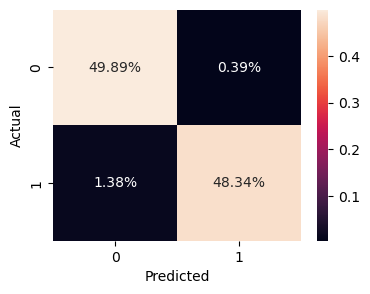

In [48]:
plt.figure(figsize=(4,3))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [49]:
print(classification_report(y_test, ypred_test))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2299
           1       0.99      0.97      0.98      2273

    accuracy                           0.98      4572
   macro avg       0.98      0.98      0.98      4572
weighted avg       0.98      0.98      0.98      4572



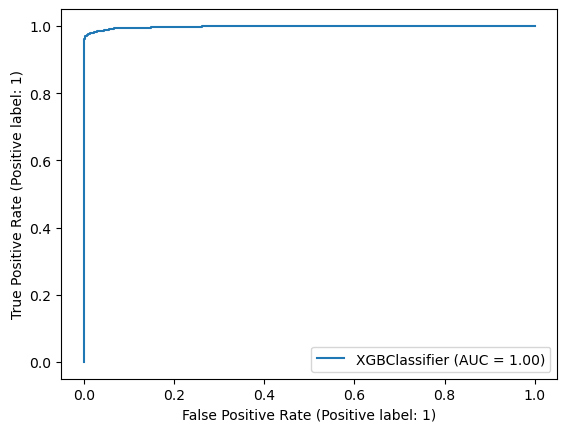

In [50]:
plot_roc_curve(model,X_test,y_test)
plt.show()

In [51]:
import pickle
#create a file, where we want to save the model
file = open('churn_xgb.pkl','wb')

#Dump the inforamtion to the file we created
pickle.dump(model, file)